<a href="https://colab.research.google.com/github/a-njan-a/Suppply-chain-mapping/blob/main/Supply_Chain_Mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import spacy
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/NLP - Relation extraction/scraped_news.csv')
df.head()

,headline,link,news
0,"GM, Canadian union reach tentative agreement, ...",https://www.reuters.com/business/autos-transpo...,"OSHAWA, Ontario, Oct 10 (Reuters) - General Mo..."
1,Union at Kia Corp suspends strike action to re...,https://www.reuters.com/business/autos-transpo...,"SEOUL, Oct 11 (Reuters) - Kia Corp's (000270.K..."
2,US SEC shortens deadline to disclose 5% stock ...,https://www.reuters.com/markets/us/us-sec-shor...,Oct 10 (Reuters) - Wall Street's top regulator...
3,"Tesla rejects union claims, reports of health ...",https://www.reuters.com/business/autos-transpo...,"BERLIN, Oct 10 (Reuters) - Tesla (TSLA.O) on T..."
4,Top issues in Detroit Three's negotiations wit...,https://www.reuters.com/business/autos-transpo...,Oct 10 (Reuters) - The United Auto Workers (UA...


In [ ]:
df = df.dropna()

def remove_first_4_words(text):
    return ' '.join(text.split(' ')[4:])

# Applying the function to the DataFrame
df['news'] = df['news'].apply(remove_first_4_words)

In [ ]:
# Initialize stopwords and stemmer/lemmatizer
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

# Define a function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):  # Check if text is a string
        # Tokenization
        words = word_tokenize(text)

        # Remove punctuation and convert to lowercase
        words = [word.lower() for word in words if word.isalnum()]

        # Remove stop words
        words = [word for word in words if word not in stop_words]

        # Remove numeric words
        words = [word for word in words if not word.isdigit()]

        # Lemmatization or stemming
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

        # Combine words back into a sentence
        cleaned_text = ' '.join(lemmatized_words)

        return cleaned_text
    else:
        return ""  # Return an empty string for non-string data


In [ ]:
for index, row in df.iterrows():
    cleaned_text = preprocess_text(row['news'])
    print(cleaned_text)

reuters general motor canadian union unifor reached tentative agreement tuesday hour worker went strike three gm facility union said tentative agreement follows pattern agreement unifor reached ford motor last month includes wage hike strike ended hour threatened largest automaker profitable truck production worker must still vote approve agreement faced shutdown key facility general motor choice get serious table agree pattern said unifor national president lana payne added gm agreed item initially fought including pension retiree income support converting temporary worker permanent employee life agreement agreement cut time needed get top pay eight year four year payne said important since many younger gm canadian worker great worker water yet still ratify agreement said gm worker darrell colley standing outside oshawa plant agreement reached gm share closed company said work resumed three facility afternoon deal recognizes many contribution represented team member significant increa

In [ ]:
# Apply preprocessing to the 'news' column and store in a new column
df['cleaned_news'] = df['news'].apply(preprocess_text)

# Create a new DataFrame with only the 'cleaned_news' column
new_df = df[['cleaned_news']]

# Save the new DataFrame to a new CSV file
new_df.to_csv('/content/cleaned_dataset.csv', index=False)  # Replace with your desired file path

new_df = pd.read_csv('/content/cleaned_dataset.csv')

In [ ]:
df.head()

,headline,link,news,cleaned_news
0,"GM, Canadian union reach tentative agreement, ...",https://www.reuters.com/business/autos-transpo...,(Reuters) - General Motors (GM.N) and Canadian...,reuters general motor canadian union unifor re...
1,Union at Kia Corp suspends strike action to re...,https://www.reuters.com/business/autos-transpo...,- Kia Corp's (000270.KS) union in South Korea ...,kia corp union south korea said would suspend ...
2,US SEC shortens deadline to disclose 5% stock ...,https://www.reuters.com/markets/us/us-sec-shor...,Wall Street's top regulator on Tuesday said it...,wall street top regulator tuesday said tighten...
3,"Tesla rejects union claims, reports of health ...",https://www.reuters.com/business/autos-transpo...,- Tesla (TSLA.O) on Tuesday rejected claims by...,tesla tuesday rejected claim german union rece...
4,Top issues in Detroit Three's negotiations wit...,https://www.reuters.com/business/autos-transpo...,"The United Auto Workers (UAW) secured a ""major...",united auto worker uaw secured major breakthro...


# Extracting relationship

In [ ]:
from tqdm import tqdm
import csv

for j in tqdm(df['news']):
  sentences = ([[i] for i in nlp(j).sents])

  myheaders = ['sentence']
  myvalues = sentences
  filename = 'article_text.csv'
  with open(filename, 'w',newline='') as myfile:
    writer = csv.writer(myfile)
    writer.writerow(myheaders)
    writer.writerows(myvalues)


100%|██████████| 227/227 [00:13<00:00, 16.60it/s]


In [ ]:
from tqdm import tqdm
import csv

# Existing file should be opened in append mode
filename = 'article_text.csv'
with open(filename, 'a', newline='') as myfile:

    # Use the 'a' mode to append to the existing file
    writer = csv.writer(myfile)

    # Iterate through the data
    for j in tqdm(df['news']):
        sentences = ([[i] for i in nlp(j).sents])

        # The header is not written for each iteration
        myvalues = sentences

        # Append the sentences
        writer.writerows(myvalues)


100%|██████████| 227/227 [00:12<00:00, 18.48it/s]


In [ ]:
csv_sentences = pd.read_csv("article_text.csv")


In [ ]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################

  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text

      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text

      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text

      ## chunk 5
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [ ]:

entity_pairs = []

for i in tqdm(csv_sentences['sentence']):
  entity_pairs.append(get_entities(i))

100%|██████████| 4241/4241 [00:27<00:00, 152.58it/s]


In [ ]:
entity_pairs

[['', ''],
 ['Mexican San Luis countries', 'Wednesday'],
 ['USTR U.S. Trade office', 'statement'],
 ['previously labor USTR', 'eligible labor contract'],
 ['also union USTR', 'also union activity'],
 ['periodic labor USTR', 'periodic  people'],
 ['2024 remediation it', '2024 remediation proceedings'],
 ['labor it', 'separate economy ministry'],
 ['Goodyear', 'wide  agreement'],
 ['4,300  workers', 'three GM facilities'],
 ['pattern Unifor', '25 wage %'],
 ['12  it', 'full size truck production'],
 ['Workers', 'still  agreement'],
 ['President Lana Payne', 'pattern'],
 ['initially retiree income', 'permanent  agreement'],
 ['which', 'four  years'],
 ['Oshawa agreement', 'Oshawa plant'],
 ['GM shares', ''],
 ['three  deal', 'significant team wages'],
 ['stubbornly labor union', 'Ford'],
 ['Auto Workers United Auto that', 'Auto Workers United Auto strike'],
 ['GM', '34,176 Deutsche Bank'],
 ['week  it', '442,586  stock'],
 ['UAW', 'two United States'],
 ['GM', '2,300 UAW strike'],
 ['Unif

In [ ]:
from spacy.matcher import Matcher
from spacy.tokens import Span

def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object
  matcher = Matcher(nlp.vocab)

  #define the pattern
  pattern = [{'DEP':'ROOT'},
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},
            {'POS':'ADJ','OP':"?"}]

  matcher.add("matching_1",[pattern])

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]]

  return(span.text)

In [ ]:
relations = [get_relation(i) for i in tqdm(csv_sentences['sentence'])]

100%|██████████| 4241/4241 [00:29<00:00, 143.33it/s]


In [ ]:
pd.Series(relations).value_counts()[:50]

said           876
is             120
said in        114
said on        109
told            60
added           59
are             37
declined        33
was             31
respond to      29
has             26
say             24
criticized      24
's              23
be              23
rejected        23
plans           21
made            20
reported        20
have            19
wants           19
think           18
estimated       18
launched        17
going           16
went on         16
comes           16
seeking         15
held            15
include         15
proposed        14
were            13
involved in     12
asked           12
urged           12
announced       12
outlined        11
hit             11
Reuters         11
won             11
ratified        11
reached         11
expanded        10
had             10
showed          10
endorsed        10
set             10
want            10
expected        10
began           10
dtype: int64

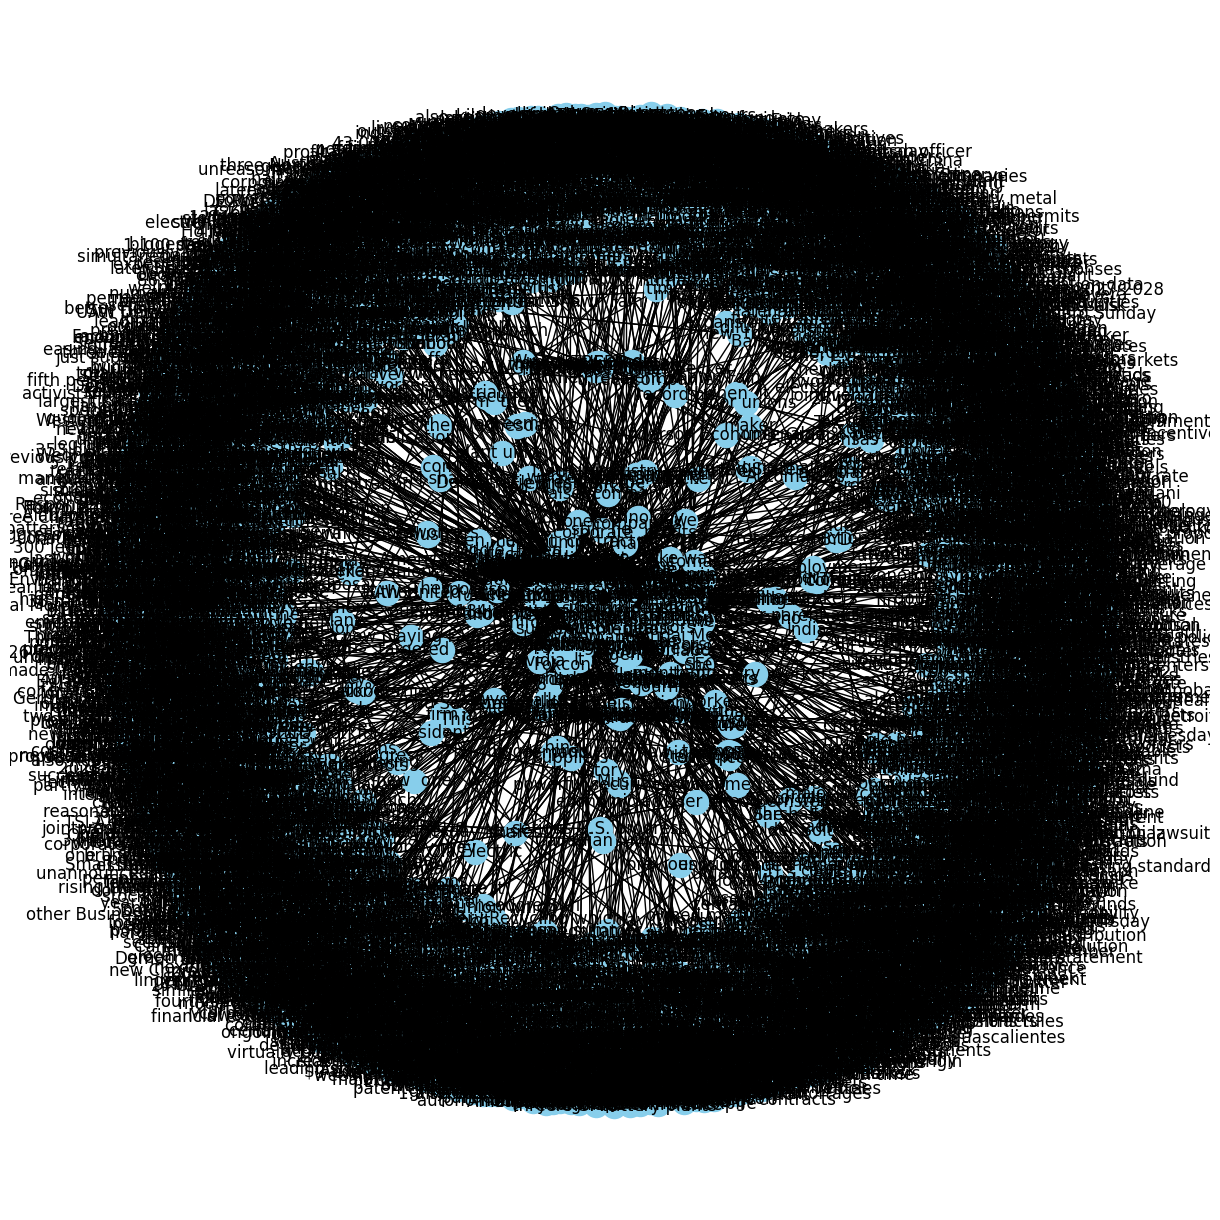

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())


plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
kg_df[20:40]

,source,target,edge
20,Auto Workers United Auto that,Auto Workers United Auto strike,set
21,GM,"34,176 Deutsche Bank",lost
22,week it,"442,586 stock",said last
23,UAW,two United States,struck
24,GM,"2,300 UAW strike",laid
25,Unifor,first Ford,used
26,GM,now pattern,said
27,UAW,new leadership,broke with
28,here General Motors,here that,said
29,Stellantis,,declined


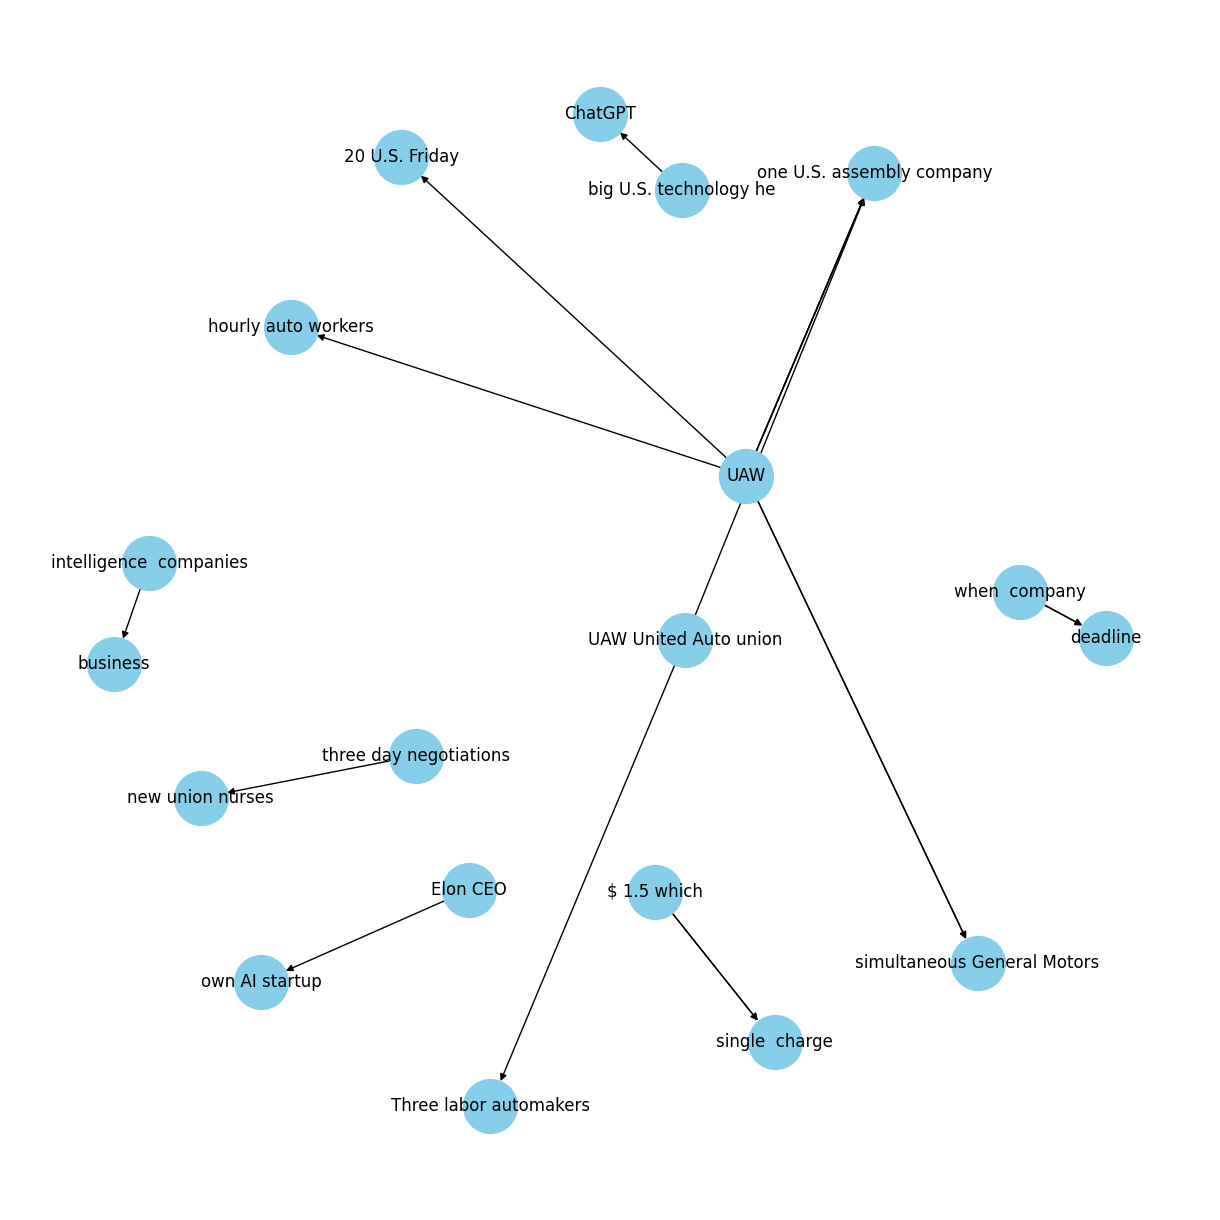

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="launched"], "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

# Dependency parsing

In [ ]:

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

for sentence in csv_sentences['sentence']:
  # Process the sentence using spaCy
  doc = nlp(sentence)

# Print the dependency tree
for token in doc:
  print(f"{token.text} --{token.dep_}--> {token.head.text}")



The --det--> plan
remediation --compound--> plan
plan --nsubj--> comes
comes --ROOT--> comes
after --prep--> comes
a --det--> petition
petition --pobj--> after
from --prep--> petition
a --det--> union
Mexican --amod--> union
independent --amod--> union
union --pobj--> from
, --punct--> union
which --nsubj--> found
found --relcl--> union
Goodyear --nsubj--> offering
was --aux--> offering
offering --ccomp--> found
employees --dative--> offering
fewer --amod--> benefits
benefits --dobj--> offering
than --prep--> benefits
an --det--> agreement
industry --npadvmod--> wide
- --punct--> wide
wide --amod--> agreement
agreement --pobj--> than
required --acl--> agreement
. --punct--> comes


In [ ]:
from spacy import displacy

displacy.render(doc, style="dep", jupyter = True)

# NER


In [ ]:
# Function to perform NER and extract entities
def extract_entities(text):
    if isinstance(text, str):
        doc = nlp(text)
        companies = []
        products = []
        locations = []

        for ent in doc.ents:
            if ent.label_ == 'ORG':  # 'ORG' represents organizations (companies)
                companies.append(ent.text)
            elif ent.label_ == 'PRODUCT':  # 'PRODUCT' represents products
                products.append(ent.text)
            elif ent.label_ in ('GPE', 'LOC'):  # 'GPE' represents geopolitical entities, 'LOC' represents locations
                locations.append(ent.text)

        return {
            'Companies': companies,
            'Products': products,
            'Locations': locations
        }
    else:
        # Return an empty dictionary for non-string input
        return {
            'Companies': [],
            'Products': [],
            'Locations': []
        }

# Apply the extract_entities function to each row in the DataFrame
new_df['entities'] = new_df['cleaned_news'].apply(extract_entities)

# Display the first few rows of the DataFrame to view the annotated information
print(new_df[['cleaned_news', 'entities']].head())


                                        cleaned_news  \
0  reuters general motor canadian union unifor re...   
1  kia corp union south korea said would suspend ...   
2  wall street top regulator tuesday said tighten...   
3  tesla tuesday rejected claim german union rece...   
4  united auto worker uaw secured major breakthro...   

                                            entities  
0  {'Companies': ['reuters general motor canadian...  
1  {'Companies': ['kia corp union', 'kia', 'kia',...  
2  {'Companies': ['sec', 'sec', 'sec', 'sec', 'se...  
3  {'Companies': ['tesla', 'german union', 'reute...  
4  {'Companies': ['united auto'], 'Products': [],...  


In [ ]:
new_df['entities'][5]

{'Companies': ['ford motor chrysler',
  'volvo',
  'united parcel',
  'delta',
  'united airline',
  'southwest airline pilot association',
  'kansa steel',
  'united steelworker union',
  'united steelworker union',
  'mgm resort caesar entertainment resort',
  'mgm caesar wynn resort new',
  'mgm grand',
  'detroit casino council dcc represents',
  'kaiser permanente union',
  'kaiser permanente',
  'ulp'],
 'Products': [],
 'Locations': ['detroit',
  'michigan',
  'ohio',
  'missouri',
  'detroit',
  'detroit',
  'new york city',
  'illinois']}

In [ ]:
new_df.to_csv('/content/annotated_dataset.csv', index=False)

In [ ]:
import pandas as pd
import ast  # Import the ast module for literal_eval

# Load the annotated dataset from the CSV file
annotated_df = pd.read_csv('/content/annotated_dataset.csv')

# Convert the string representations of dictionaries to actual dictionaries
annotated_df['entities'] = annotated_df['entities'].apply(ast.literal_eval)

# View the first few rows of the DataFrame
print(annotated_df.head())

# Access and view specific columns
companies_column = annotated_df['entities'].apply(lambda x: x.get('Companies', []))
products_column = annotated_df['entities'].apply(lambda x: x.get('Products', []))
locations_column = annotated_df['entities'].apply(lambda x: x.get('Locations', []))

# View specific columns
print("Companies:")
print(companies_column.head())

print("Products:")
print(products_column.head())

print("Locations:")
print(locations_column.head())



                                        cleaned_news  \
0  reuters general motor canadian union unifor re...   
1  kia corp union south korea said would suspend ...   
2  wall street top regulator tuesday said tighten...   
3  tesla tuesday rejected claim german union rece...   
4  united auto worker uaw secured major breakthro...   

                                            entities  
0  {'Companies': ['reuters general motor canadian...  
1  {'Companies': ['kia corp union', 'kia', 'kia',...  
2  {'Companies': ['sec', 'sec', 'sec', 'sec', 'se...  
3  {'Companies': ['tesla', 'german union', 'reute...  
4  {'Companies': ['united auto'], 'Products': [],...  
Companies:
0    [reuters general motor canadian union, gm, for...
1    [kia corp union, kia, kia, reuters, kia, kia, ...
2                            [sec, sec, sec, sec, sec]
3                       [tesla, german union, reuters]
4                                        [united auto]
Name: entities, dtype: object
Products:
0    []

In [ ]:
annotated_df['entities'][0]['Companies']

['reuters general motor canadian union',
 'gm',
 'ford motor',
 'gm',
 'gm',
 'gm',
 'gm',
 'gm',
 'ford',
 'gm',
 'deutsche bank',
 'gm',
 'united state part',
 'gm',
 'ford',
 'gm',
 'general motor stellantis',
 'ford',
 'gm',
 'chrysler parent stellantis',
 'uaw',
 'volvo']

##POS Tagging

In [ ]:
df['news'] = df['news'].fillna('').astype(str)

# Function to apply NER and extract POS and NER tags
def extract_pos_ner_tags(text):
    doc = nlp(text)
    pos_tags = [token.pos_ for token in doc]
    ner_tags = [token.ent_type_ for token in doc]
    return pos_tags, ner_tags

# Apply the function to the 'news' column
df[['pos_tags', 'ner_tags']] = df['news'].apply(extract_pos_ner_tags).apply(pd.Series)

# Display the results
for index, row in df.iterrows():
    doc = nlp(row['news'])
    for token in doc:
        print(f"{token.text}: POS={token.pos_}, NER={token.ent_type_}")
    print("\n")

Streaming output truncated to the last 5000 lines.
IG: POS=PROPN, NER=ORG
Metall: POS=PROPN, NER=ORG
on: POS=ADP, NER=
Monday: POS=PROPN, NER=DATE
called: POS=VERB, NER=
for: POS=SCONJ, NER=
Tesla: POS=PROPN, NER=ORG
to: POS=PART, NER=
improve: POS=VERB, NER=
staffing: POS=NOUN, NER=
conditions: POS=NOUN, NER=
at: POS=ADP, NER=
its: POS=PRON, NER=
German: POS=ADJ, NER=NORP
gigafactory: POS=NOUN, NER=
as: POS=SCONJ, NER=
it: POS=PRON, NER=
prepares: POS=VERB, NER=
to: POS=PART, NER=
expand: POS=VERB, NER=
,: POS=PUNCT, NER=
with: POS=ADP, NER=
the: POS=DET, NER=
carmaker: POS=NOUN, NER=
due: POS=ADP, NER=
to: POS=PART, NER=
publish: POS=VERB, NER=
its: POS=PRON, NER=
expansion: POS=NOUN, NER=
plans: POS=NOUN, NER=
for: POS=ADP, NER=
feedback: POS=NOUN, NER=
from: POS=ADP, NER=
the: POS=DET, NER=
community: POS=NOUN, NER=
later: POS=ADV, NER=DATE
this: POS=DET, NER=DATE
week: POS=NOUN, NER=DATE
.: POS=PUNCT, NER=
Tesla: POS=PROPN, NER=ORG
's: POS=PART, NER=
(: POS=PUNCT, NER=
TSLA.O: POS

In [ ]:
for index, row in df.iterrows():
    doc = nlp(row['news'])
    potential_locations = []

    for i, token in enumerate(doc):
        if token.pos_ == 'PROPN' and (token.ent_type_ == 'GPE' or token.ent_type_ == 'LOC'):
            # Noun with GPE or LOC as NER entity, potential location mention
            location_mention = {'text': token.text, 'POS': token.pos_, 'NER': token.ent_type_, 'adjectives': []}

            # Check for adjectives before the noun for additional context
            #for j in range(i-1, max(i-4, -1), -1):  # Consider up to 4 tokens before the noun
             #   if doc[j].pos_ == 'ADJ':
              #      location_mention['adjectives'].append(doc[j].text)

            potential_locations.append(location_mention)

    # Print the identified potential location mentions
    if potential_locations:
        print(f"News Article {index}:")
        for location_mention in potential_locations:
            print(f"Location Mention: {location_mention['text']}, POS={location_mention['POS']}, NER={location_mention['NER']}")
            if location_mention['adjectives']:
                print(f"   - Adjectives: {', '.join(location_mention['adjectives'])}")
    print("\n")

News Article 0:
Location Mention: U.S., POS=PROPN, NER=GPE
Location Mention: U.S., POS=PROPN, NER=GPE
Location Mention: United, POS=PROPN, NER=GPE
Location Mention: States, POS=PROPN, NER=GPE
Location Mention: U.S., POS=PROPN, NER=GPE
Location Mention: Michigan, POS=PROPN, NER=GPE
Location Mention: Ohio, POS=PROPN, NER=GPE
Location Mention: Pennsylvania, POS=PROPN, NER=GPE
Location Mention: Pennsylvania, POS=PROPN, NER=GPE
Location Mention: Florida, POS=PROPN, NER=GPE
Location Mention: Maryland, POS=PROPN, NER=GPE
Location Mention: U.S., POS=PROPN, NER=GPE


News Article 1:
Location Mention: South, POS=PROPN, NER=GPE
Location Mention: Korea, POS=PROPN, NER=GPE
Location Mention: South, POS=PROPN, NER=GPE
Location Mention: Korea, POS=PROPN, NER=GPE




News Article 3:
Location Mention: Berlin, POS=PROPN, NER=GPE
Location Mention: U.S., POS=PROPN, NER=GPE
Location Mention: Brandenburg, POS=PROPN, NER=GPE


News Article 4:
Location Mention: Detroit, POS=PROPN, NER=GPE
Location Mention: Fai

In [ ]:
def is_location_mention(token):
    return (token.pos_ == "PROPN" and (token.ent_type_ == "GPE" or token.ent_type_ == "LOC")) or \
           (token.pos_ == "ADJ" and token.head.pos_ == "PROPN" and (token.head.ent_type_ == "GPE" or token.head.ent_type_ == "LOC"))

# Apply the heuristics to a sentence
for token in doc:
    if is_location_mention(token):
        print(f"Potential location mention: {token.text}")

Potential location mention: United
Potential location mention: States
Potential location mention: Mexico
Potential location mention: San
Potential location mention: Luis
Potential location mention: Potosi
Potential location mention: Mexico
Potential location mention: Mexico


# Co-occurrence statistics

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


# Combine text data into a single string
corpus = " ".join(df['cleaned_news'])

# Use CountVectorizer to create a document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([corpus])

# Convert the document-term matrix to a DataFrame
co_occurrence_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=['Co-Occurrence'])

# Extract co-occurrence statistics
co_occurrence_statistics = co_occurrence_matrix.transpose().sort_values('Co-Occurrence', ascending=False)

# Display the co-occurrence statistics
co_occurrence_statistics[:20]


,Co-Occurrence
said,1268
worker,797
strike,667
uaw,654
union,612
company,523
ford,429
automaker,413
plant,386
three,358


# OpenNRE

In [ ]:
!git clone https://github.com/thunlp/OpenNRE.git

Cloning into 'OpenNRE'...
remote: Enumerating objects: 1533, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 1533 (delta 88), reused 111 (delta 74), pack-reused 1377
Receiving objects: 100% (1533/1533), 266.84 MiB | 36.15 MiB/s, done.
Resolving deltas: 100% (908/908), done.


In [ ]:
%cd OpenNRE
!pip install -r requirements.txt
!python setup.py install


/content/OpenNRE
ERROR: Could not find a version that satisfies the requirement torch==1.6.0 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1)
ERROR: No matching distribution found for torch==1.6.0
/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Ple

In [ ]:
df['news'][5]

'A tight U.S. labor market, the expiry of union contracts and high living costs have led to tough negotiations for pay hikes and benefits, triggering strikes and protests across industries. Nearly 309,700 workers have been involved in work stoppages and strikes through August this year, according to preliminary data from the U.S. Bureau of Labor Statistics, putting 2023 on track to becoming the busiest year for strikes since 2019. Here are some sectors and companies that faced tough negotiations in 2023: Members of the Writers Guild of America (WGA) approved a new three-year contract with major studios on Oct. 9. Film and television writers had walked off the job in May over compensation, staffing and residual payments, among other issues. They went back to work on Sept. 27 after negotiators reached a tentative agreement. In July, the SAG-AFTRA actors union joined the writers on picket lines, and it remains on strike. Negotiators for striking Hollywood actors met with representatives o

In [ ]:
import opennre

In [ ]:
# download NRE pretrained model
model = opennre.get_model('wiki80_cnn_softmax')

# text used to look for relations
text = """
Members of the Writers Guild of America (WGA) approved a new three-year contract with major studios on Oct. 9. Film and television writers had walked off the job in May over compensation, staffing and residual payments, among other issues.
 """

# choose two entities whose relation is to be predicted
h_text = "Writers Guild of America"
t_text = "contract"
h_pos = (text.index(h_text), text.index(h_text) + len(h_text))
t_pos = (text.index(t_text), text.index(t_text) + len(t_text))

# predict relation
model.infer({'text': text, 'h': {'pos': h_pos}, 't': {'pos': t_pos}})

('member of', 0.4112873673439026)

In [ ]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
import plotly.express as px
import plotly.graph_objs as go

# Create a DataFrame
df = df = pd.read_csv('/content/drive/MyDrive/Projects/NLP - Relation extraction/Graph.csv')

# Group companies by location and join them
df_grouped = df.groupby('Locations')['Companies'].apply(lambda x: ', '.join(x)).reset_index()

# Load the country code data for the map
df_codes = px.data.gapminder()[['country', 'iso_alpha']]
df_codes = df_codes.rename(columns={'country': 'Locations'})

# Merge the company data with the country codes
df_merged = pd.merge(df_grouped, df_codes, on='Locations')

# Create a choropleth map using Plotly
fig = px.choropleth(df_merged, locations="iso_alpha",
                    color="Locations",
                    hover_name="Companies",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Company Locations Worldwide')

# Show the map
fig.show()